In [ ]:
import cv2

In [ ]:
def aug_saturation(src, value):
  dst = cv2.cvtColor(src, cv2.COLOR_BGR2HSV).astype(int)
  dst[:, :, 1] += value

  dst = np.clip(dst, 0, 255).astype(np.uint8)
  dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
  return dst

In [ ]:
def aug_brightness(src, value):
  dst = (src.astype(int) + value)
  dst = np.clip(dst, 0, 255).astype(np.uint8)
  return dst

In [ ]:
def aug_shear(src, x_value=0, y_value=0):
  H, W = src.shape[:2]
  shear_W = int(abs(x_value) * H + W)
  shear_H = int(abs(y_value) * W + H)

  dst = src.copy()
  if x_value < 0: dst = np.hstack((np.zeros((H, shear_W - W, 3), np.uint8), dst))
  if y_value < 0: dst = np.vstack((np.zeros((shear_H - H, W, 3), np.uint8), dst))
  
  M = np.array([
    [1, x_value, 0],
    [y_value, 1, 0]
  ], np.float)
  dst = cv2.warpAffine(dst, M, (shear_W, shear_H))
  dst = cv2.resize(dst, (W, H))
  return dst

In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow

im = cv2.resize(cv2.imread('BKAV.JPG'), (2048 // 4, 1344 // 4))

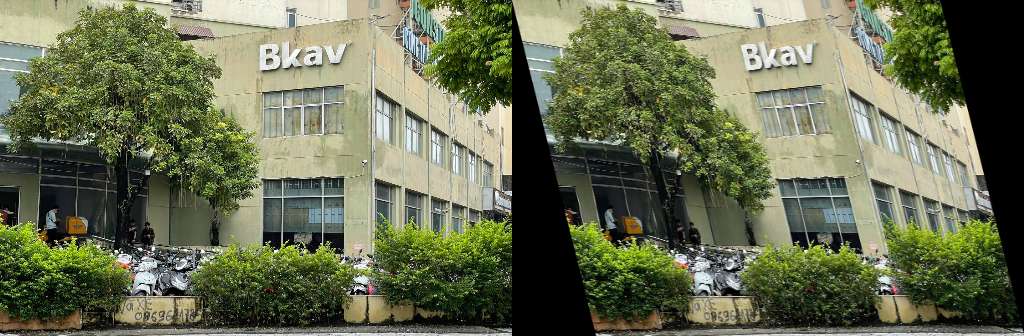

In [ ]:
cv2_imshow(np.hstack((im, aug_shear(im, 0.3))))

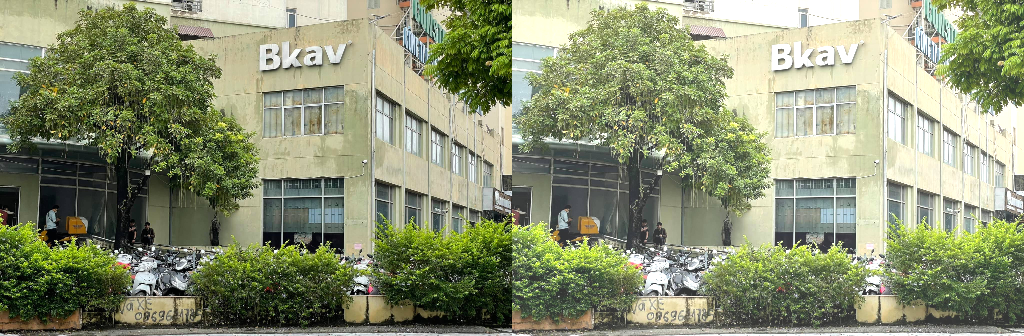

In [ ]:
cv2_imshow(np.hstack((im, aug_brightness(im, 50))))

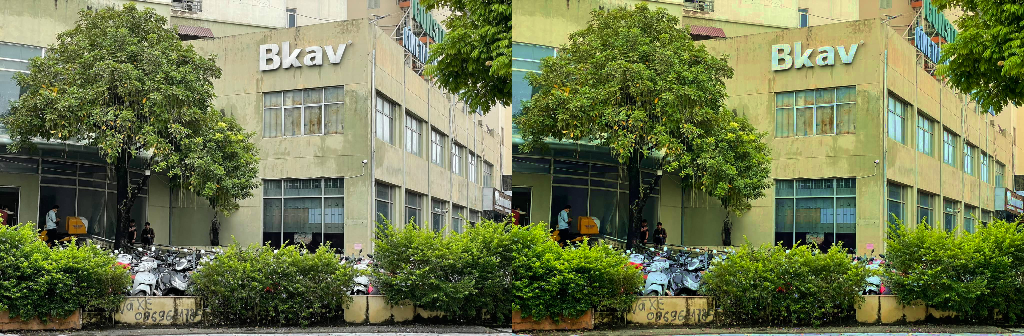

In [ ]:
cv2_imshow(np.hstack((im, aug_saturation(im, 50))))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Uni/CS406.M11/faster-rcnn/raw

/content/drive/.shortcut-targets-by-id/1VjNVunzN8PyJ4Ehluoah01gILJkk8KiV/CS406.M11/faster-rcnn/raw


In [ ]:
import json
annotations = dict()
with open('train/_annotations.coco.json', 'r') as af:
  annotations = json.loads(af.read())

In [ ]:
def get_bboxes(image_id):
  image_rel = filter(lambda anno: anno['image_id'] == image_id, annotations['annotations'])
  bboxes = list(map(lambda info: info['bbox'], image_rel))
  return bboxes

In [ ]:
import os
for im_info in annotations['images'][:50]:
  print("IMAGE ID ", im_info['id'], sep='#')
  imf_path = os.path.join('train', im_info['file_name'])
  im = cv2.imread(imf_path)

  cv2.imwrite(os.path.join('train_aug', '.'.join(['br', im_info['file_name']])), aug_brightness(im, -50))
  cv2.imwrite(os.path.join('train_aug', '.'.join(['sa', im_info['file_name']])), aug_saturation(im, 50))

  im_shear = im.copy()
  bboxes = get_bboxes(im_info['id'])
  for x, y, w, h in bboxes:
    im_shear[y:y + h, x:x + w] = aug_shear(im_shear[y:y + h, x:x + w], 0.3)
  cv2.imwrite(os.path.join('train_aug', '.'.join(['sh', im_info['file_name']])), im_shear)